# Finding outliers using GRP and Impressions

In [1]:
import calendar
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import datetime
from dateutil import parser

import warnings

warnings.filterwarnings("ignore")

sns.set(rc={"figure.figsize": (11.7, 8.27)})

In [2]:
dat = pd.read_csv("../cleaned_data.csv")
dat = dat.loc[:, "Access":]
dat["Date Aired"] = pd.to_datetime(dat["Date Aired"], format="%Y-%m-%d")
dat["Time Aired"] = pd.to_datetime(dat["Time Aired"], format="%H:%M:%S").dt.time

dat['month'] = pd.DatetimeIndex(dat['Date Aired']).month
dat['month'] = dat['month'].apply(lambda x: calendar.month_name[x])

station_averages = dat.groupby(['month', 'Station ID']).mean().reindex(level=1)

## January Outliers

#### Impressions

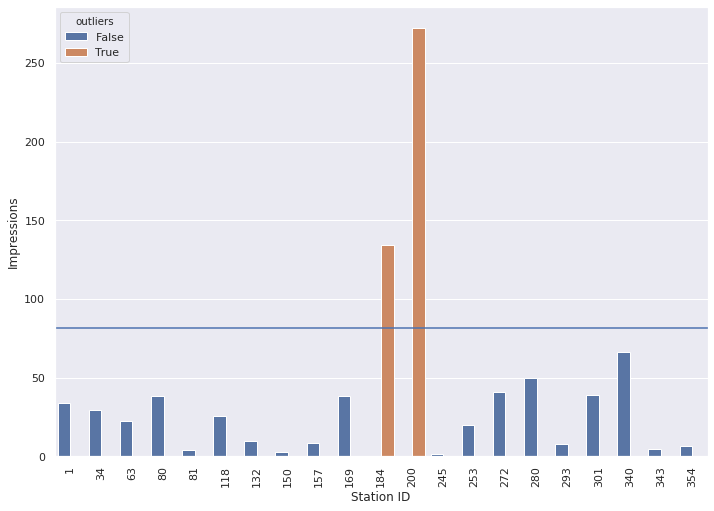

In [3]:
january = station_averages.iloc[station_averages.index.get_level_values('month')=='January']
january = january[january['Impressions'].notnull() & january['Impressions']>0]
january['outliers'] = np.where(january['Impressions'] < 2*january['Impressions'].mean(), False, True)
box = sns.barplot(x=january.index.get_level_values('Station ID'), y=january['Impressions'], 
                  data=january, palette=sns.color_palette(), hue='outliers')
line = box.axhline(2*january['Impressions'].mean())
box.set_xticklabels(box.get_xticklabels(), rotation=90)
plt.show()

#### GRP

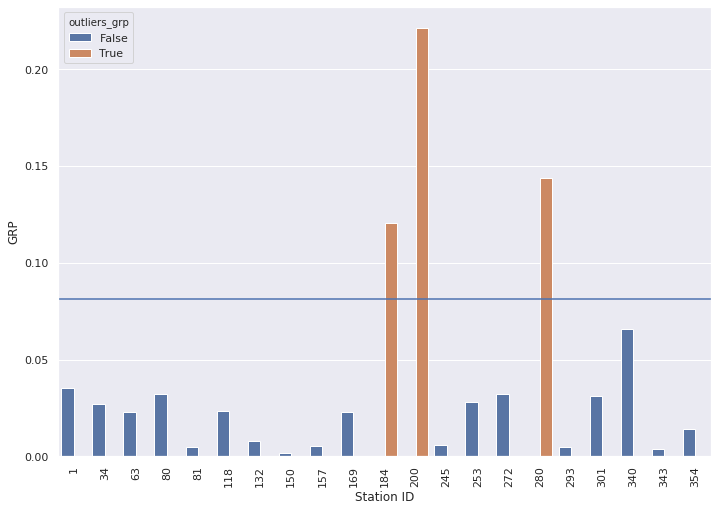

In [4]:
january['outliers_grp'] = np.where(january['GRP'] < 2*january['GRP'].mean(), False, True)
box = sns.barplot(x=january.index.get_level_values('Station ID'), y=january['GRP'], 
                  data=january, palette=sns.color_palette(), hue='outliers_grp')
line = box.axhline(2*january['GRP'].mean())
box.set_xticklabels(box.get_xticklabels(), rotation=90)
plt.show()

In [5]:
outliers_jan = january[(january.outliers == True) & (january.outliers_grp == True)]
outliers_jan

GRP  Impressions  Length   Spot Cost  outliers  \
month   Station ID                                                        
January 184         0.120308   134.450000    30.0   49.230769      True   
        200         0.221176   272.177778    30.0  588.705882      True   

                    outliers_grp  
month   Station ID                
January 184                 True  
        200                 True

## February Outliers

#### Impressions

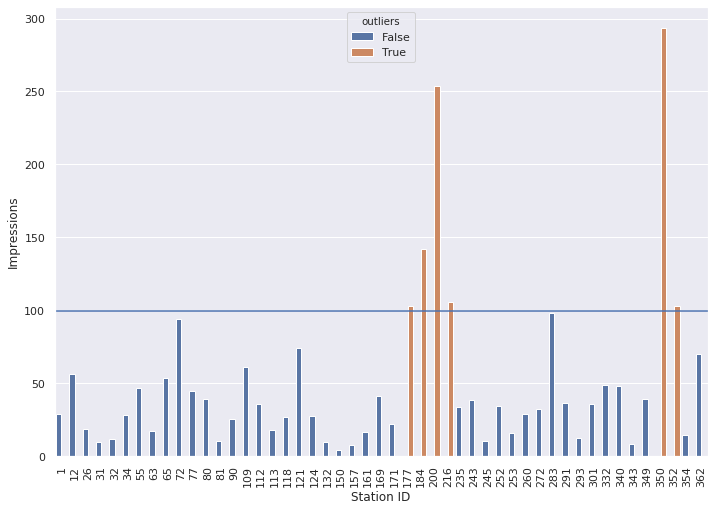

In [6]:
february = station_averages.iloc[station_averages.index.get_level_values('month')=='February']
february = february[february['Impressions'].notnull() & february['Impressions']>0]
february['outliers'] = np.where(february['Impressions'] < 2*february['Impressions'].mean(), False, True)
box = sns.barplot(x=february.index.get_level_values('Station ID'), y=february['Impressions'], 
                  data=february, palette=sns.color_palette(), hue='outliers')
line = box.axhline(2*february['Impressions'].mean())
box.set_xticklabels(box.get_xticklabels(), rotation=90)
plt.show()

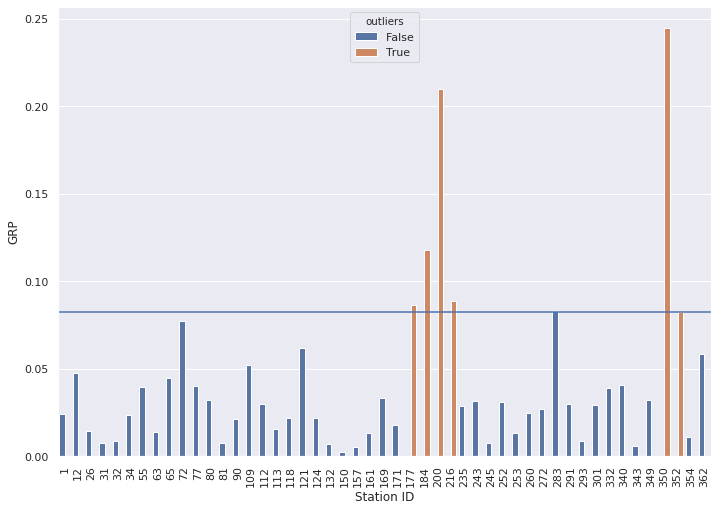

In [7]:
february['outliers_grp'] = np.where(february['GRP'] < 2*february['GRP'].mean(), False, True)
box = sns.barplot(x=february.index.get_level_values('Station ID'), y=february['GRP'], 
                  data=february, palette=sns.color_palette(), hue='outliers')
line = box.axhline(2*february['GRP'].mean())
box.set_xticklabels(box.get_xticklabels(), rotation=90)
plt.show()

In [8]:
outliers_february = february[(february.outliers == True) & (february.outliers_grp == True)]
outliers_february

GRP  Impressions  Length    Spot Cost  outliers  \
month    Station ID                                                         
February 177         0.086154   103.138462    30.0   403.076923      True   
         184         0.118000   142.200000    30.0   160.000000      True   
         200         0.209684   253.557895    30.0  1127.578947      True   
         216         0.088793   105.585586    30.0   211.459459      True   
         350         0.244571   293.409524    30.0   440.000000      True   
         352         0.082667   102.933333    30.0   784.000000      True   

                     outliers_grp  
month    Station ID                
February 177                 True  
         184                 True  
         200                 True  
         216                 True  
         350                 True  
         352                 True

## March outliers

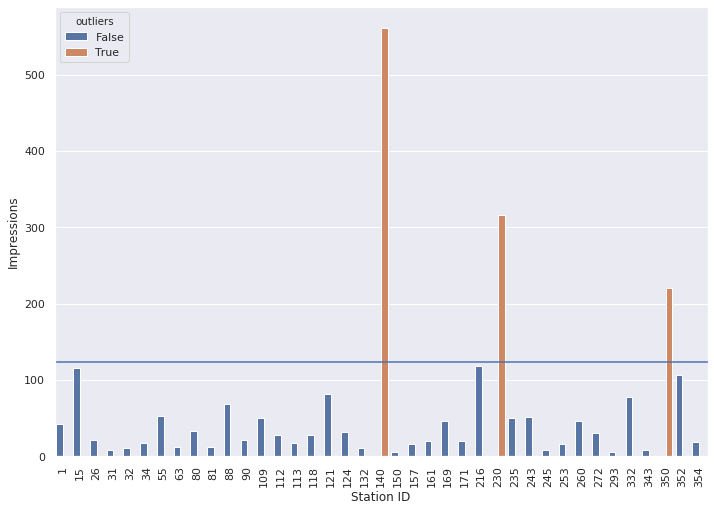

In [9]:
march = station_averages.iloc[station_averages.index.get_level_values('month')=='March']
march = march[march['Impressions'].notnull() & march['Impressions']>0]
march['outliers'] = np.where(march['Impressions'] < 2*march['Impressions'].mean(), False, True)
box = sns.barplot(x=march.index.get_level_values('Station ID'), y=march['Impressions'], 
                  data=march, palette=sns.color_palette(), hue='outliers')
line = box.axhline(2*march['Impressions'].mean())
box.set_xticklabels(box.get_xticklabels(), rotation=90)
plt.show()

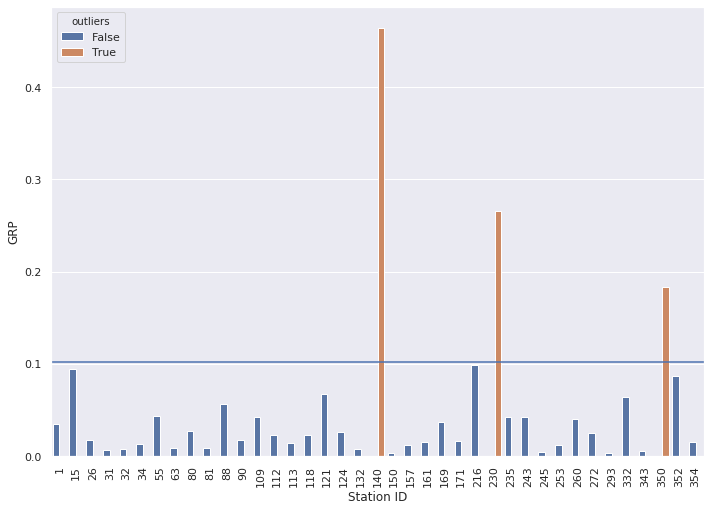

In [10]:
march['outliers_grp'] = np.where(march['GRP'] < 2*march['GRP'].mean(), False, True)
box = sns.barplot(x=march.index.get_level_values('Station ID'), y=march['GRP'], 
                  data=march, palette=sns.color_palette(), hue='outliers')
line = box.axhline(2*march['GRP'].mean())
box.set_xticklabels(box.get_xticklabels(), rotation=90)
plt.show()

In [11]:
outliers_march = march[(march.outliers == True) & (march.outliers_grp == True)]
outliers_march

GRP  Impressions  Length  Spot Cost  outliers  \
month Station ID                                                     
March 140         0.4640        561.0    30.0      800.0      True   
      230         0.2656        316.8    30.0      400.0      True   
      350         0.1840        220.0    30.0      440.0      True   

                  outliers_grp  
month Station ID                
March 140                 True  
      230                 True  
      350                 True

# April

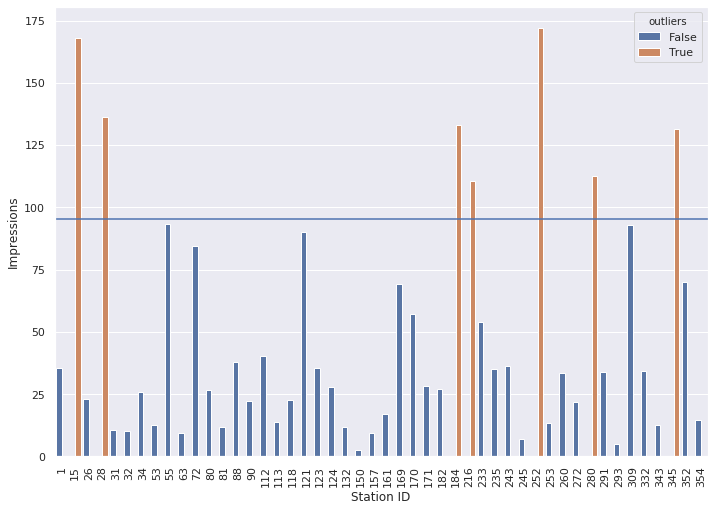

In [12]:
april = station_averages.iloc[station_averages.index.get_level_values('month')=='April']
april = april[april['Impressions'].notnull() & april['Impressions']>0]
april['outliers'] = np.where(april['Impressions'] < 2*april['Impressions'].mean(), False, True)
box = sns.barplot(x=april.index.get_level_values('Station ID'), y=april['Impressions'], 
                  data=april, palette=sns.color_palette(), hue='outliers')
line = box.axhline(2*april['Impressions'].mean())
box.set_xticklabels(box.get_xticklabels(), rotation=90)
plt.show()

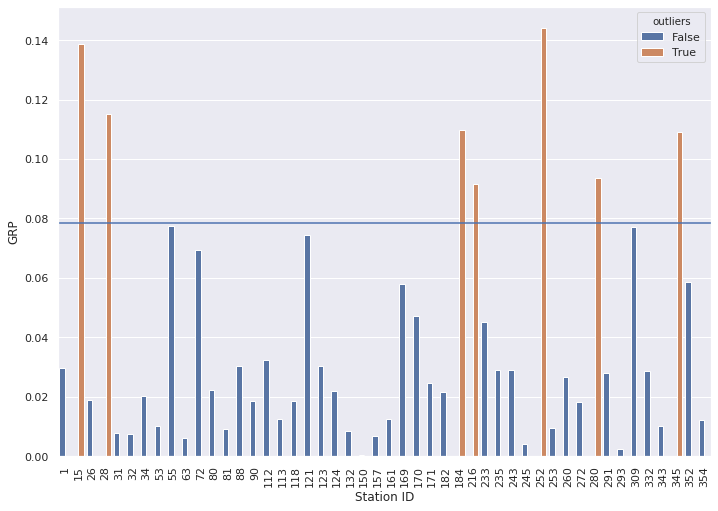

In [13]:
april['outliers_grp'] = np.where(april['GRP'] < 2*april['GRP'].mean(), False, True)
box = sns.barplot(x=april.index.get_level_values('Station ID'), y=april['GRP'], 
                  data=april, palette=sns.color_palette(), hue='outliers')
line = box.axhline(2*april['GRP'].mean())
box.set_xticklabels(box.get_xticklabels(), rotation=90)
plt.show()

In [14]:
outliers_april = april[(april.outliers == True) & (april.outliers_grp == True)]
outliers_april

GRP  Impressions     Length    Spot Cost  outliers  \
month Station ID                                                            
April 15          0.138800   168.160000  30.000000   360.000000      True   
      28          0.115200   136.320000  30.000000  1200.000000      True   
      184         0.109639   132.931148  30.000000   264.262295      True   
      216         0.091467   110.413333  30.000000   248.000000      True   
      252         0.144000   171.938462  30.000000  1083.076923      True   
      280         0.093565   112.730435  20.217391   525.217391      True   
      345         0.108927   131.422517  30.000000    93.139073      True   

                  outliers_grp  
month Station ID                
April 15                  True  
      28                  True  
      184                 True  
      216                 True  
      252                 True  
      280                 True  
      345                 True

## May 

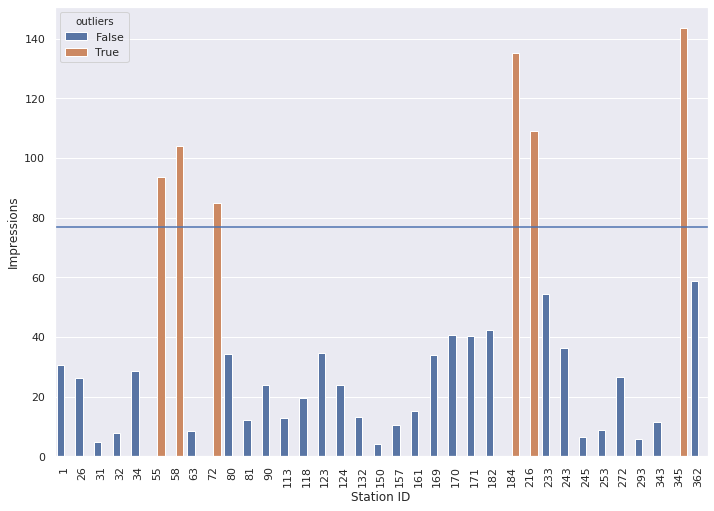

In [15]:
may = station_averages.iloc[station_averages.index.get_level_values('month')=='May']
may = may[may['Impressions'].notnull() & may['Impressions']>0]
may['outliers'] = np.where(may['Impressions'] < 2*may['Impressions'].mean(), False, True)
box = sns.barplot(x=may.index.get_level_values('Station ID'), y=may['Impressions'], 
                  data=may, palette=sns.color_palette(), hue='outliers')
line = box.axhline(2*may['Impressions'].mean())
box.set_xticklabels(box.get_xticklabels(), rotation=90)
plt.show()

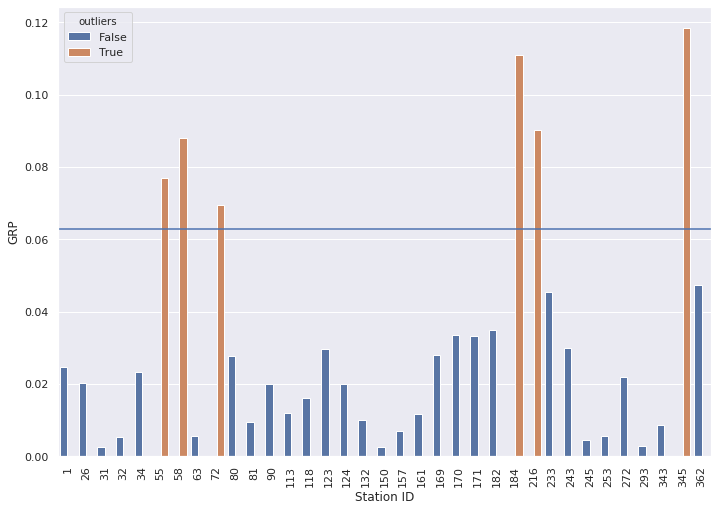

In [16]:
may['outliers_grp'] = np.where(may['GRP'] < 2*may['GRP'].mean(), False, True)
box = sns.barplot(x=may.index.get_level_values('Station ID'), y=may['GRP'], 
                  data=may, palette=sns.color_palette(), hue='outliers')
line = box.axhline(2*may['GRP'].mean())
box.set_xticklabels(box.get_xticklabels(), rotation=90)
plt.show()

In [17]:
outliers_may = may[(may.outliers == True) & (may.outliers_grp == True)]
outliers_may

GRP  Impressions  Length   Spot Cost  outliers  \
month Station ID                                                        
May   55          0.076800    93.525333    30.0  661.333333      True   
      58          0.088000   104.160000    30.0  400.000000      True   
      72          0.069538    84.800000    30.0  304.000000      True   
      184         0.111030   135.224242    30.0  203.636364      True   
      216         0.090146   108.956098    30.0  248.000000      True   
      345         0.118356   143.495890    30.0  105.095890      True   

                  outliers_grp  
month Station ID                
May   55                  True  
      58                  True  
      72                  True  
      184                 True  
      216                 True  
      345                 True

## June

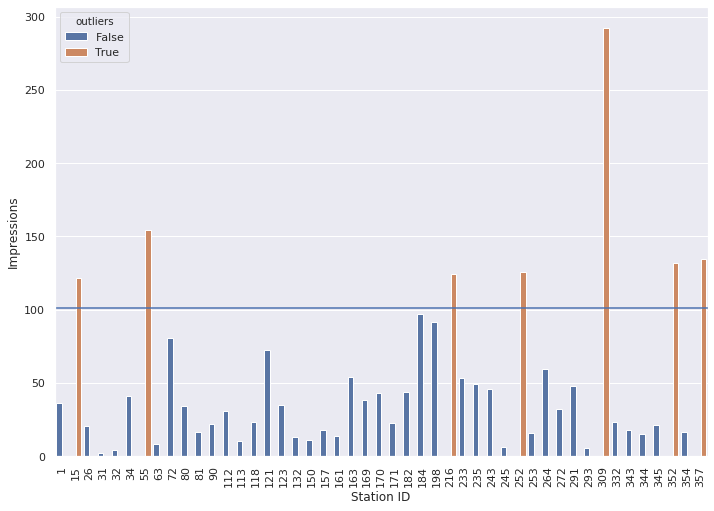

In [18]:
june = station_averages.iloc[station_averages.index.get_level_values('month')=='June']
june = june[june['Impressions'].notnull() & june['Impressions']>0]
june['outliers'] = np.where(june['Impressions'] < 2*june['Impressions'].mean(), False, True)
box = sns.barplot(x=june.index.get_level_values('Station ID'), y=june['Impressions'], 
                  data=june, palette=sns.color_palette(), hue='outliers')
line = box.axhline(2*june['Impressions'].mean())
box.set_xticklabels(box.get_xticklabels(), rotation=90)
plt.show()

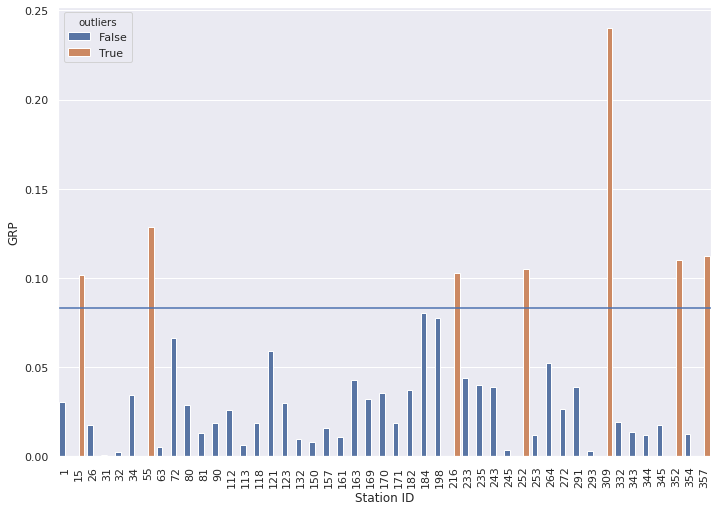

In [19]:
june['outliers_grp'] = np.where(june['GRP'] < 2*june['GRP'].mean(), False, True)
box = sns.barplot(x=june.index.get_level_values('Station ID'), y=june['GRP'], 
                  data=june, palette=sns.color_palette(), hue='outliers')
line = box.axhline(2*june['GRP'].mean())
box.set_xticklabels(box.get_xticklabels(), rotation=90)
plt.show()

In [20]:
outliers_june = june[(june.outliers == True) & (june.outliers_grp == True)]
outliers_june

GRP  Impressions  Length    Spot Cost  outliers  \
month Station ID                                                         
June  15          0.101647   121.482353    30.0   207.058824      True   
      55          0.128533   154.506667    30.0   704.000000      True   
      216         0.102904   124.668493    30.0   254.246575      True   
      252         0.105000   125.800000    30.0   800.000000      True   
      309         0.240000   292.160000    30.0  1360.000000      True   
      352         0.110049   131.902439    30.0   240.000000      True   
      357         0.112000   134.872727    30.0   280.000000      True   

                  outliers_grp  
month Station ID                
June  15                  True  
      55                  True  
      216                 True  
      252                 True  
      309                 True  
      352                 True  
      357                 True

## July

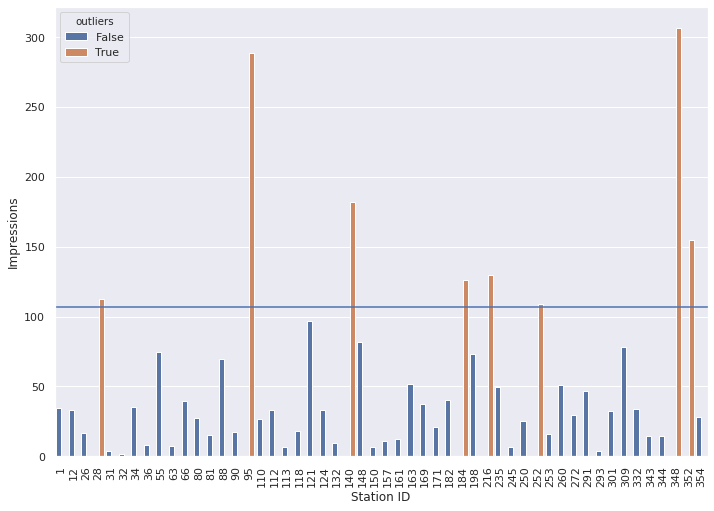

In [21]:
july = station_averages.iloc[station_averages.index.get_level_values('month')=='July']
july = july[july['Impressions'].notnull() & july['Impressions']>0]
july['outliers'] = np.where(july['Impressions'] < 2*july['Impressions'].mean(), False, True)
box = sns.barplot(x=july.index.get_level_values('Station ID'), y=july['Impressions'], 
                  data=july, palette=sns.color_palette(), hue='outliers')
line = box.axhline(2*july['Impressions'].mean())
box.set_xticklabels(box.get_xticklabels(), rotation=90)
plt.show()

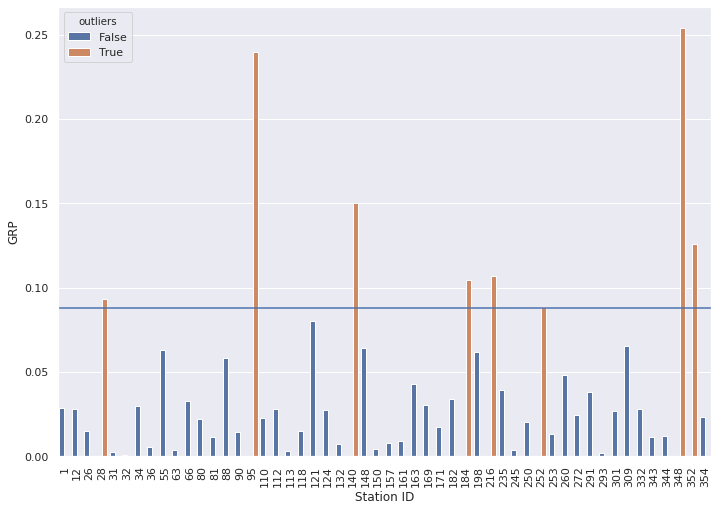

In [22]:
july['outliers_grp'] = np.where(july['GRP'] < 2*july['GRP'].mean(), False, True)
box = sns.barplot(x=july.index.get_level_values('Station ID'), y=july['GRP'], 
                  data=july, palette=sns.color_palette(), hue='outliers')
line = box.axhline(2*july['GRP'].mean())
box.set_xticklabels(box.get_xticklabels(), rotation=90)
plt.show()

In [23]:
outliers_july = july[(july.outliers == True) & (july.outliers_grp == True)]
outliers_july

GRP  Impressions  Length   Spot Cost  outliers  \
month Station ID                                                        
July  28          0.093511   112.355556    30.0  608.000000      True   
      95          0.240000   288.738462    30.0  640.000000      True   
      140         0.150400   181.920000    30.0  560.000000      True   
      184         0.104471   125.835294    30.0  232.941176      True   
      216         0.106851   129.894253    30.0  240.000000      True   
      252         0.088800   109.200000    30.0  616.800000      True   
      348         0.253880   306.428916    30.0  150.602410      True   
      352         0.125714   154.742857    30.0  176.000000      True   

                  outliers_grp  
month Station ID                
July  28                  True  
      95                  True  
      140                 True  
      184                 True  
      216                 True  
      252                 True  
      348                 True  
      352                 True

## August

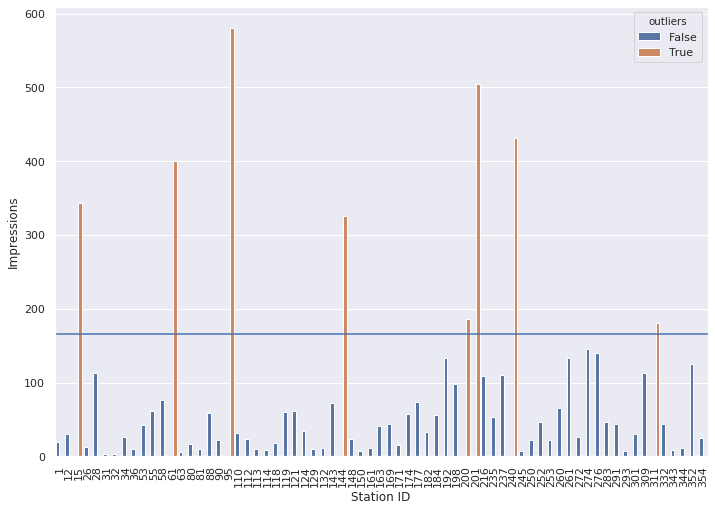

In [24]:
august = station_averages.iloc[station_averages.index.get_level_values('month')=='August']
august = august[august['Impressions'].notnull() & august['Impressions']>0]
august['outliers'] = np.where(august['Impressions'] < 2*august['Impressions'].mean(), False, True)
box = sns.barplot(x=august.index.get_level_values('Station ID'), y=august['Impressions'], 
                  data=august, palette=sns.color_palette(), hue='outliers')
line = box.axhline(2*august['Impressions'].mean())
box.set_xticklabels(box.get_xticklabels(), rotation=90)
plt.show()

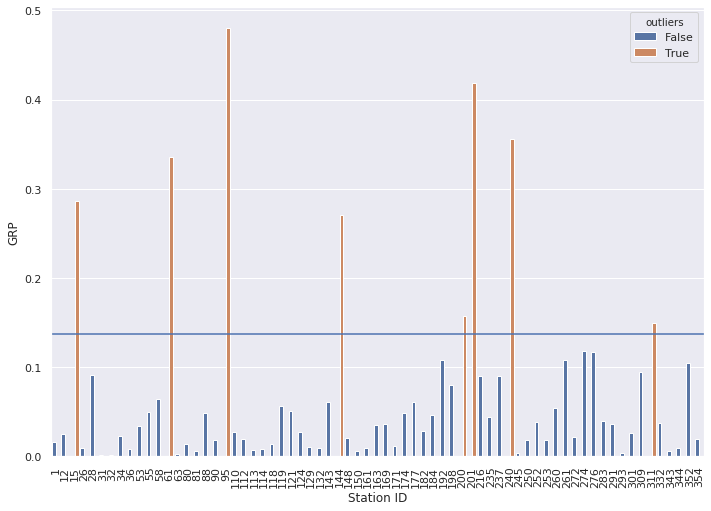

In [25]:
august['outliers_grp'] = np.where(august['GRP'] < 2*august['GRP'].mean(), False, True)
box = sns.barplot(x=august.index.get_level_values('Station ID'), y=august['GRP'], 
                  data=august, palette=sns.color_palette(), hue='outliers')
line = box.axhline(2*august['GRP'].mean())
box.set_xticklabels(box.get_xticklabels(), rotation=90)
plt.show()

In [26]:
outliers_august = august[(august.outliers == True) & (august.outliers_grp == True)]
outliers_august

GRP  Impressions  Length    Spot Cost  outliers  \
month  Station ID                                                         
August 15          0.285818   343.200000    30.0  2690.909091      True   
       61          0.336000   400.800000    30.0  4480.000000      True   
       95          0.480000   580.266667    30.0   960.000000      True   
       144         0.270769   326.276923    30.0  2720.000000      True   
       200         0.157333   186.666667    30.0  1220.000000      True   
       201         0.418286   504.914286    30.0  3040.000000      True   
       240         0.356000   430.800000    30.0  4320.000000      True   
       311         0.149333   180.800000    30.0  1280.000000      True   

                   outliers_grp  
month  Station ID                
August 15                  True  
       61                  True  
       95                  True  
       144                 True  
       200                 True  
       201                 True  
       240                 True  
       311                 True

## September

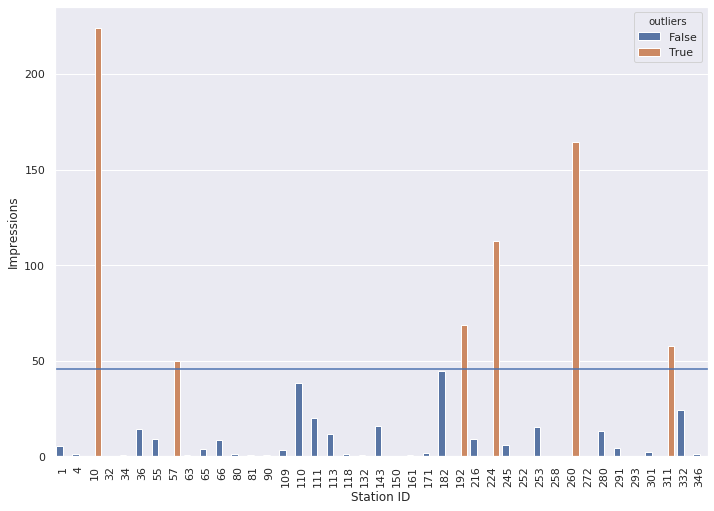

In [27]:
sep = station_averages.iloc[station_averages.index.get_level_values('month')=='September']
sep = sep[sep['Impressions'].notnull() & sep['Impressions']>0]
sep['outliers'] = np.where(sep['Impressions'] < 2*sep['Impressions'].mean(), False, True)
box = sns.barplot(x=sep.index.get_level_values('Station ID'), y=sep['Impressions'], 
                  data=sep, palette=sns.color_palette(), hue='outliers')
line = box.axhline(2*sep['Impressions'].mean())
box.set_xticklabels(box.get_xticklabels(), rotation=90)
plt.show()

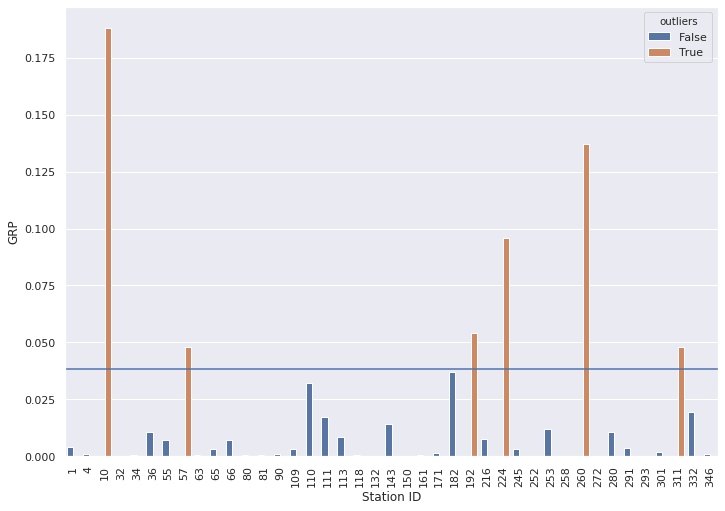

In [28]:
sep['outliers_grp'] = np.where(sep['GRP'] < 2*sep['GRP'].mean(), False, True)
box = sns.barplot(x=sep.index.get_level_values('Station ID'), y=sep['GRP'], 
                  data=sep, palette=sns.color_palette(), hue='outliers')
line = box.axhline(2*sep['GRP'].mean())
box.set_xticklabels(box.get_xticklabels(), rotation=90)
plt.show()

In [29]:
outliers_september = sep[(sep.outliers == True) & (sep.outliers_grp == True)]
outliers_september

GRP  Impressions  Length    Spot Cost  outliers  \
month     Station ID                                                         
September 10          0.188000   224.000000    30.0  2000.000000      True   
          57          0.048000    49.600000    30.0   384.000000      True   
          192         0.054000    68.800000    30.0   720.000000      True   
          224         0.096000   112.800000    30.0  1320.000000      True   
          260         0.137108   164.553846    30.0  1053.415385      True   
          311         0.048000    57.760000    30.0  1280.000000      True   

                      outliers_grp  
month     Station ID                
September 10                  True  
          57                  True  
          192                 True  
          224                 True  
          260                 True  
          311                 True

## October

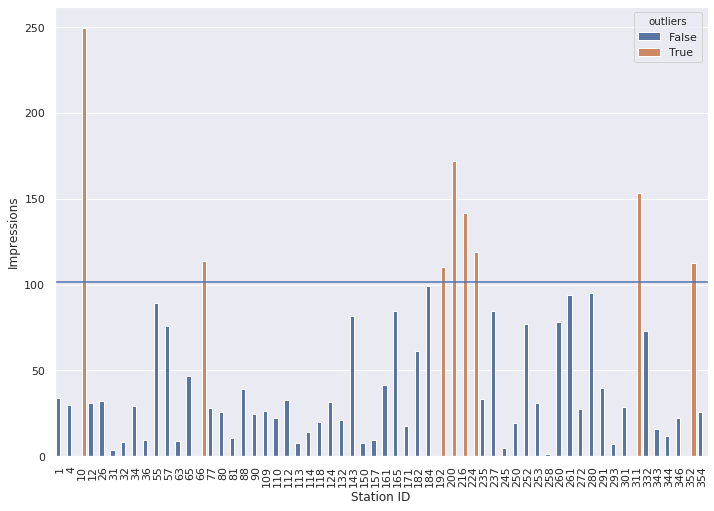

In [30]:
october = station_averages.iloc[station_averages.index.get_level_values('month')=='October']
october = october[october['Impressions'].notnull() & october['Impressions']>0]
october['outliers'] = np.where(october['Impressions'] < 2*october['Impressions'].mean(), False, True)
box = sns.barplot(x=october.index.get_level_values('Station ID'), y=october['Impressions'], 
                  data=october, palette=sns.color_palette(), hue='outliers')
line = box.axhline(2*october['Impressions'].mean())
box.set_xticklabels(box.get_xticklabels(), rotation=90)
plt.show()

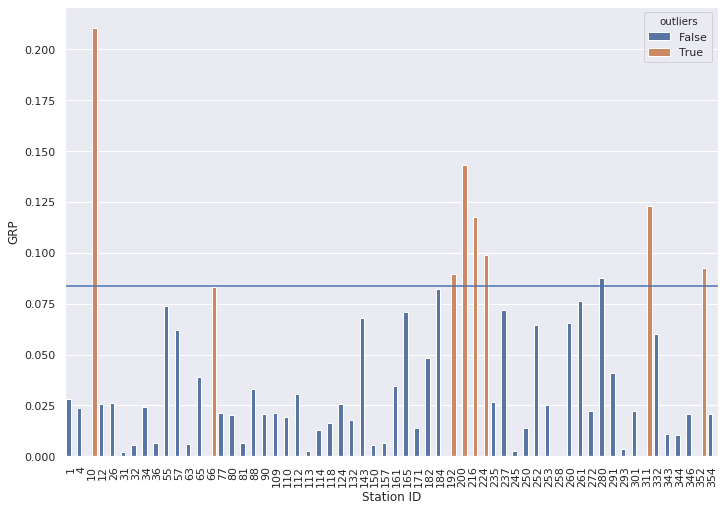

In [31]:
october['outliers_grp'] = np.where(october['GRP'] < 2*october['GRP'].mean(), False, True)
box = sns.barplot(x=october.index.get_level_values('Station ID'), y=october['GRP'], 
                  data=october, palette=sns.color_palette(), hue='outliers')
line = box.axhline(2*october['GRP'].mean())
box.set_xticklabels(box.get_xticklabels(), rotation=90)
plt.show()

In [32]:
outliers_october = october[(october.outliers == True) & (october.outliers_grp == True)]
outliers_october

GRP  Impressions  Length    Spot Cost  outliers  \
month   Station ID                                                         
October 10          0.210424   249.400000    30.0  1963.636364      True   
        192         0.089412   110.537143    30.0   939.831933      True   
        200         0.143000   172.088889    30.0  1280.000000      True   
        216         0.117538   141.461538    30.0   280.000000      True   
        224         0.099097   118.815584    30.0  1286.967742      True   
        311         0.123077   153.411765    30.0  1253.846154      True   
        352         0.092308   112.553846    30.0   192.000000      True   

                    outliers_grp  
month   Station ID                
October 10                  True  
        192                 True  
        200                 True  
        216                 True  
        224                 True  
        311                 True  
        352                 True

## November 

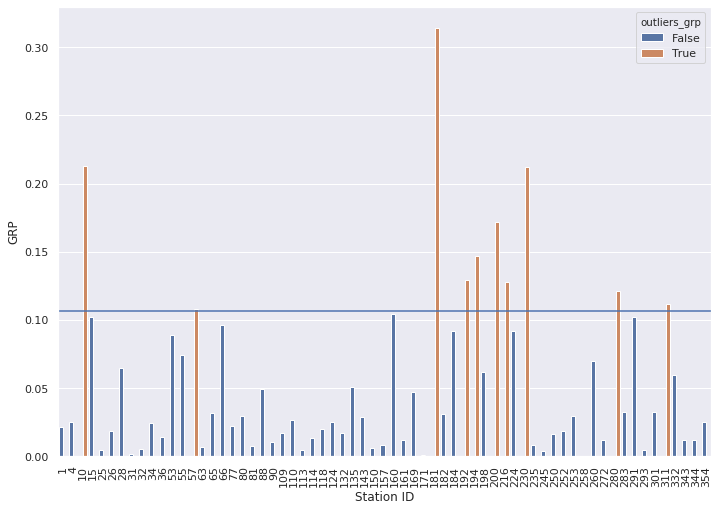

In [33]:
nov = station_averages.iloc[station_averages.index.get_level_values('month')=='November']
nov = nov[nov['GRP'].notnull() & nov['GRP']>0]
nov['outliers_grp'] = np.where(nov['GRP'] < 2*nov['GRP'].mean(), False, True)
box = sns.barplot(x=nov.index.get_level_values('Station ID'), y=nov['GRP'], 
                  data=nov, palette=sns.color_palette(), hue='outliers_grp')
line = box.axhline(2*nov['GRP'].mean())
box.set_xticklabels(box.get_xticklabels(), rotation=90)
plt.show()

In [34]:
outliers_november = nov[(nov.outliers_grp == True)]
outliers_november

GRP  Impressions  Length    Spot Cost  outliers_grp
month    Station ID                                                          
November 10          0.212571          NaN    30.0  1828.571429          True
         57          0.107780          NaN    30.0   388.219780          True
         181         0.314000          NaN    30.0  2350.000000          True
         192         0.129000          NaN    30.0   980.000000          True
         194         0.147200          NaN    30.0  1920.000000          True
         200         0.172000          NaN    30.0  1280.000000          True
         216         0.128000          NaN    30.0   304.000000          True
         230         0.212000          NaN    30.0   333.333333          True
         280         0.120923          NaN    30.0  1122.307692          True
         311         0.111429          NaN    30.0  1269.285714          True

## December

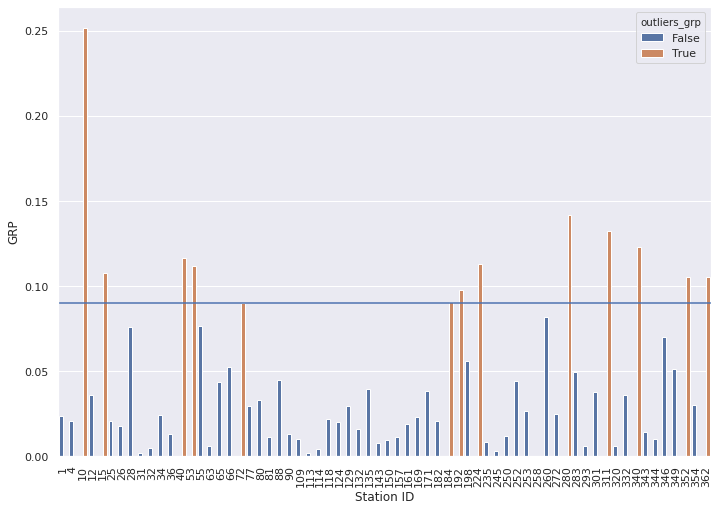

In [35]:
dec = station_averages.iloc[station_averages.index.get_level_values('month')=='December']
dec = dec[dec['GRP'].notnull() & dec['GRP']>0]
dec['outliers_grp'] = np.where(dec['GRP'] < 2*dec['GRP'].mean(), False, True)
box = sns.barplot(x=dec.index.get_level_values('Station ID'), y=dec['GRP'], 
                  data=dec, palette=sns.color_palette(), hue='outliers_grp')
line = box.axhline(2*dec['GRP'].mean())
box.set_xticklabels(box.get_xticklabels(), rotation=90)
plt.show()

In [36]:
outliers_december = dec[(dec.outliers_grp == True)]
outliers_december

GRP  Impressions  Length    Spot Cost  outliers_grp
month    Station ID                                                          
December 10          0.251636          NaN    30.0  1600.000000          True
         15          0.107636          NaN    30.0  1320.000000          True
         40          0.116667          NaN    30.0   960.000000          True
         53          0.111619          NaN    30.0  1386.666667          True
         72          0.090286          NaN    30.0    86.857143          True
         184         0.090514          NaN    30.0   445.714286          True
         192         0.097600          NaN    30.0   742.400000          True
         224         0.113091          NaN    30.0  1069.090909          True
         280         0.141867          NaN    30.0  1120.000000          True
         311         0.132200          NaN    30.0  1030.000000          True
         340         0.123200          NaN    30.0    31.200000          True
         352         0.105600          NaN    30.0   792.000000          True
         362         0.105143          NaN    30.0  1074.285714          True

# All outliers

In [38]:
all_outliers = pd.concat([outliers_jan, outliers_february, outliers_march, outliers_april, outliers_may, 
                          outliers_june, outliers_july, outliers_august, outliers_september, 
                          outliers_october, outliers_november, outliers_december],)

In [39]:
all_outliers

GRP  Impressions  Length    Spot Cost outliers  \
month    Station ID                                                        
January  184         0.120308   134.450000    30.0    49.230769     True   
         200         0.221176   272.177778    30.0   588.705882     True   
February 177         0.086154   103.138462    30.0   403.076923     True   
         184         0.118000   142.200000    30.0   160.000000     True   
         200         0.209684   253.557895    30.0  1127.578947     True   
...                       ...          ...     ...          ...      ...   
December 280         0.141867          NaN    30.0  1120.000000      NaN   
         311         0.132200          NaN    30.0  1030.000000      NaN   
         340         0.123200          NaN    30.0    31.200000      NaN   
         352         0.105600          NaN    30.0   792.000000      NaN   
         362         0.105143          NaN    30.0  1074.285714      NaN   

                     outliers_grp  
month    Station ID                
January  184                 True  
         200                 True  
February 177                 True  
         184                 True  
         200                 True  
...                           ...  
December 280                 True  
         311                 True  
         340                 True  
         352                 True  
         362                 True  

[83 rows x 6 columns]

### Show stations that were outliers the most over the period

In [40]:
top_outliers = all_outliers.groupby('Station ID').size().sort_values(ascending=False)
top_outliers

Station ID
216    7
184    6
352    5
311    5
200    5
10     4
15     4
192    4
224    3
280    3
252    3
72     2
57     2
55     2
230    2
140    2
28     2
345    2
350    2
95     2
53     1
40     1
58     1
61     1
362    1
144    1
177    1
181    1
357    1
201    1
240    1
260    1
309    1
340    1
348    1
194    1
dtype: int64

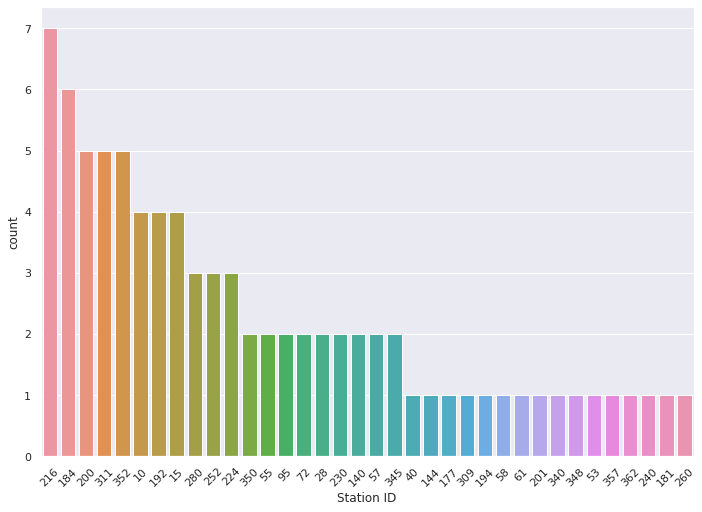

In [41]:
box = sns.countplot(all_outliers.index.get_level_values('Station ID'),
                    order = all_outliers.index.get_level_values('Station ID').value_counts().index)
box.set_xticklabels(box.get_xticklabels(), rotation=45)
plt.show()

In [43]:
import pickle

with open('outlier_stations.pickle', 'wb') as f:
    pickle.dump(top_outliers, f)